## Seminarski rad: Analiza interesovanja ucenica za STEM radionice

#### Uvod

Razvoj interesovanja ucenika za nauku, tehnologiju, inzenjerstvo i matematiku (STEM) jedan je od glavnih ciljeva savremenog obrazovanja. 
Tradicionalni pristupi nastavi često nisu dovoljni da probude motivaciju i radoznalost kod učenika, pa se sve više koriste interaktivne radionice i projekti.

U okviru projekata Centra za promociju nauke Republike Srbije sprovedene su radionice *Potraga za blagom* i *(Ne)Moguca misija*, 
koje su ucenicima osnovnih i srednjih skola ponudile priliku da kroz igru, saradnju i praktican rad povezu znanja iz matematike, fizike i informatike.

Cilj ovog rada je da se, na osnovu prikupljenih podataka o ucesnicima radionica, predvidi stepen saglasnosti ucenika sa izjavom:
**„Verujem da na ovaj način mogu više da naučim u odnosu na tradicionalne metode nastave“ (i8).**


#### Ucitavanje podataka

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("podaci/STEM_anketa.csv")
df.head()

,Id,workshop,sex,class,math,physics,informatics,experience,i1,i2,...,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14
0,1,1,1,9,5,5,5,0,5,5,...,5,5,5,5,5,5,5,5,5,5
1,2,1,1,10,5,5,5,1,5,5,...,5,4,5,5,5,5,5,5,5,5
2,3,1,1,9,3,5,5,1,5,5,...,5,5,5,5,5,3,3,5,5,5
3,4,1,1,9,2,4,5,0,5,4,...,4,4,5,5,3,2,3,4,3,5
4,5,1,1,9,5,4,5,0,3,2,...,5,2,2,3,4,5,3,5,3,5


#### Opis podataka

##### Osnovne informacije o podacima

In [11]:
import sys

df.info(
    verbose=True,
    buf=sys.stdout,
    memory_usage=True,
    show_counts=True
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id           208 non-null    int64
 1   workshop     208 non-null    int64
 2   sex          208 non-null    int64
 3   class        208 non-null    int64
 4   math         208 non-null    int64
 5   physics      208 non-null    int64
 6   informatics  208 non-null    int64
 7   experience   208 non-null    int64
 8   i1           208 non-null    int64
 9   i2           208 non-null    int64
 10  i3           208 non-null    int64
 11  i4           208 non-null    int64
 12  i5           208 non-null    int64
 13  i6           208 non-null    int64
 14  i7           208 non-null    int64
 15  i8           208 non-null    int64
 16  i9           208 non-null    int64
 17  i10          208 non-null    int64
 18  i11          208 non-null    int64
 19  i12          208 non-null    int64
 20  i13       

In [8]:
# Broj nedostajucih vrednosti za svaku kolonu
df.isnull().sum()

Id             0
workshop       0
sex            0
class          0
math           0
physics        0
informatics    0
experience     0
i1             0
i2             0
i3             0
i4             0
i5             0
i6             0
i7             0
i8             0
i9             0
i10            0
i11            0
i12            0
i13            0
i14            0
dtype: int64

In [9]:
df.isna().any()

Id             False
workshop       False
sex            False
class          False
math           False
physics        False
informatics    False
experience     False
i1             False
i2             False
i3             False
i4             False
i5             False
i6             False
i7             False
i8             False
i9             False
i10            False
i11            False
i12            False
i13            False
i14            False
dtype: bool

In [10]:
df.describe(
    percentiles=[0.25, 0.5, 0.75],
    exclude=[object]
)

,Id,workshop,sex,class,math,physics,informatics,experience,i1,i2,...,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,104.500000,1.480769,1.495192,8.346154,3.697115,3.956731,4.759615,0.567308,4.634615,4.485577,...,4.557692,4.038462,4.432692,4.355769,4.110577,3.788462,4.379808,4.466346,4.533654,4.370192
std,60.188592,0.500835,0.501183,1.409212,1.211695,1.064605,0.529245,1.009754,0.565646,0.680852,...,0.678545,0.947135,0.677655,0.797560,0.993838,1.023144,0.825310,0.701153,0.680169,0.762956
min,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,0.000000,3.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
25%,52.750000,1.000000,1.000000,7.000000,3.000000,3.000000,5.000000,0.000000,4.000000,4.000000,...,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000
50%,104.500000,1.000000,1.000000,9.000000,4.000000,4.000000,5.000000,0.000000,5.000000,5.000000,...,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000
75%,156.250000,2.000000,2.000000,9.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,208.000000,2.000000,2.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##### Vizuelizacija celog skupa podataka boxplot diagramom

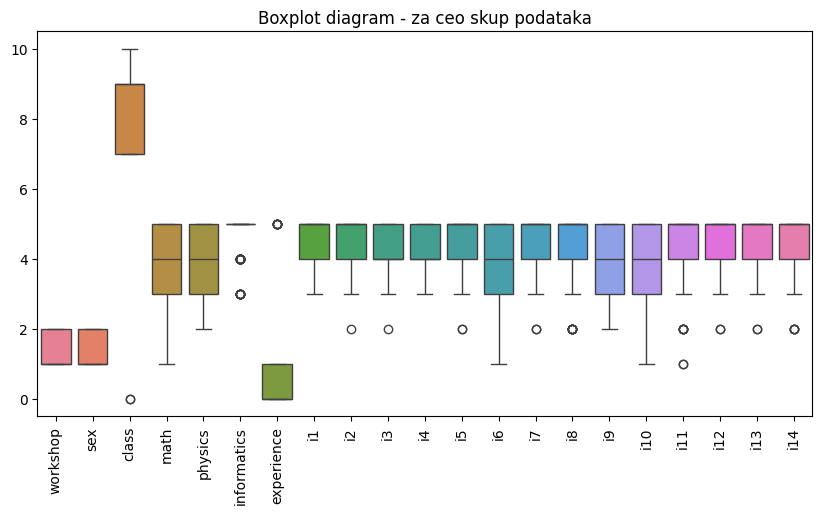

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop(columns=['Id']))
plt.xticks(rotation=90)

plt.title("Boxplot diagram - za ceo skup podataka")
plt.show()

##### Ocene

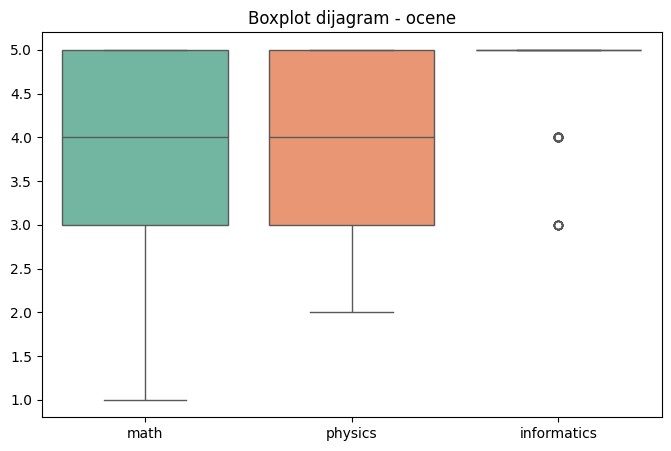

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["math","physics","informatics"]], palette="Set2")
plt.title("Boxplot dijagram - ocene")
plt.show()

##### Izjave i1-i14

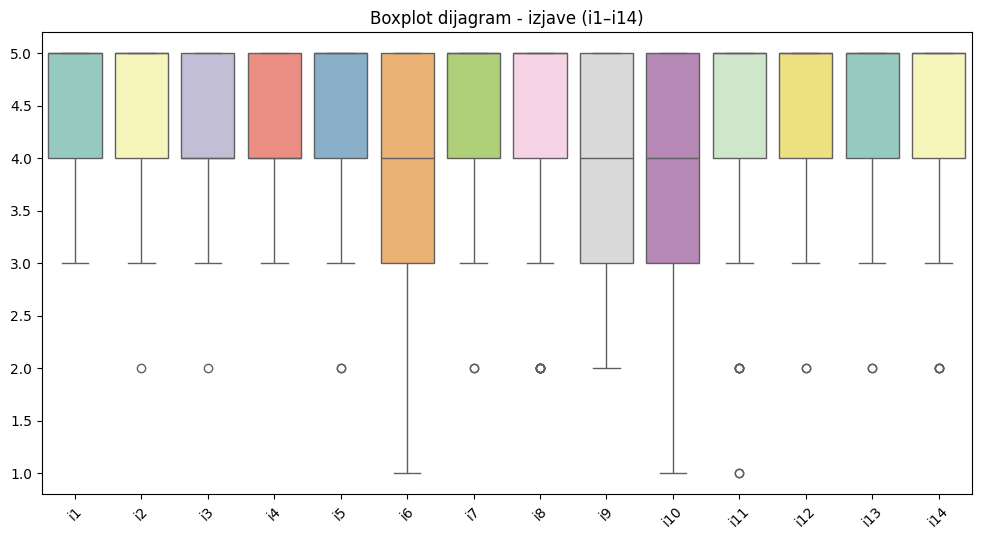

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[[f"i{i}" for i in range(1,15)]], palette="Set3")
plt.title("Boxplot dijagram - izjave (i1–i14)")
plt.xticks(rotation=45)
plt.show()

##### Raspodela ciljne promenljive (i8)

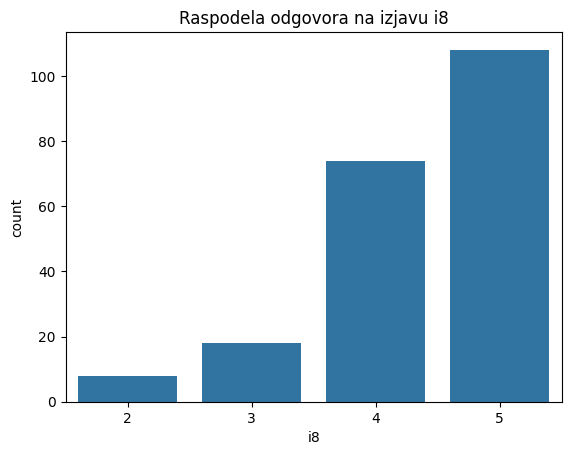

In [23]:
sns.countplot(x='i8', data=df)
plt.title('Raspodela odgovora na izjavu i8')
plt.show()

#### EDA (Eksplorativna analizacija podataka)

##### 1. Raspodela pola (sex)

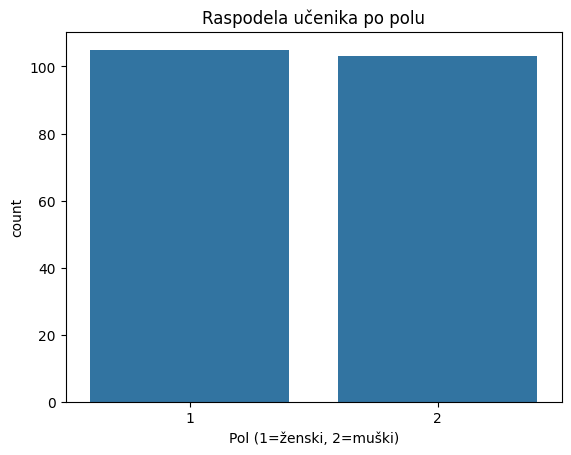

In [24]:
# Raspodela pola
sns.countplot(x="sex", data=df)
plt.title("Raspodela učenika po polu")
plt.xlabel("Pol (1=ženski, 2=muški)")
plt.show()

##### 2. Raspodela po vrsti radionice (workshop)

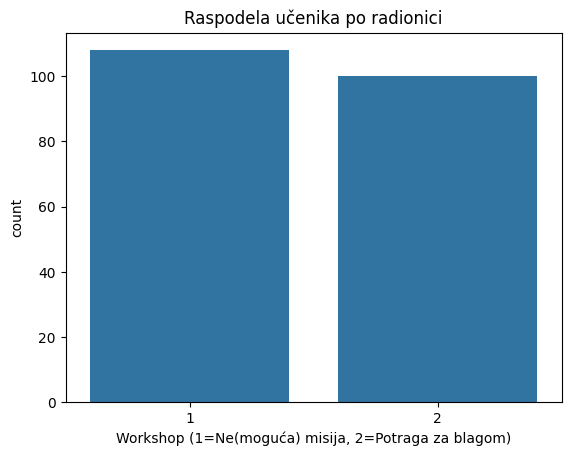

In [25]:
# Raspodela radionica
sns.countplot(x="workshop", data=df)
plt.title("Raspodela učenika po radionici")
plt.xlabel("Workshop (1=Ne(moguća) misija, 2=Potraga za blagom)")
plt.show()

##### 3. Raspodela iskustva

- experience = 0 (nema prethodnog iskustva)
- experience = 1 (ima iskustva)

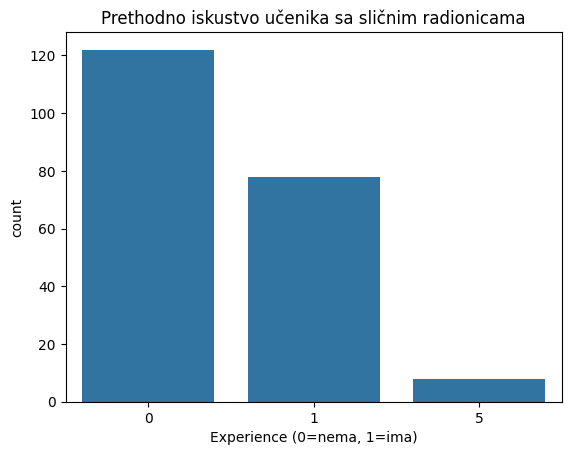

In [16]:
# Raspodela prethodnog iskustva
sns.countplot(x="experience", data=df)
plt.title("Prethodno iskustvo učenika sa sličnim radionicama")
plt.xlabel("Experience (0=nema, 1=ima)")
plt.show()

In [26]:
print("Pol:", df["sex"].unique())
print("Radionice:", df["workshop"].unique())
print("Iskustvo:", df["experience"].unique())

Pol: [1 2]
Radionice: [1 2]
Iskustvo: [0 1 5]


In [27]:
df["experience"] = df["experience"].replace(5, 1)
print("Iskustvo nakon korekcije:", df["experience"].unique())

Iskustvo nakon korekcije: [0 1]


In [28]:
print("Pol (sex):")
print(df["sex"].value_counts())

print("\nRadionice (workshop):")
print(df["workshop"].value_counts())

print("\nIskustvo (experience):")
print(df["experience"].value_counts())

Pol (sex):
sex
1    105
2    103
Name: count, dtype: int64

Radionice (workshop):
workshop
1    108
2    100
Name: count, dtype: int64

Iskustvo (experience):
experience
0    122
1     86
Name: count, dtype: int64


##### Provera duplikata

In [29]:
duplikati = df.duplicated().sum()
print(f"Broj duplikata u tabeli: {duplikati}")

Broj duplikata u tabeli: 0


In [30]:
print("\nBroj jedinstvenih vrednosti po kolonama:")
print(df.nunique())


Broj jedinstvenih vrednosti po kolonama:
Id             208
workshop         2
sex              2
class            5
math             5
physics          4
informatics      3
experience       2
i1               3
i2               4
i3               4
i4               3
i5               4
i6               5
i7               4
i8               4
i9               4
i10              5
i11              5
i12              4
i13              4
i14              4
dtype: int64


##### Histogram raspodele ocena

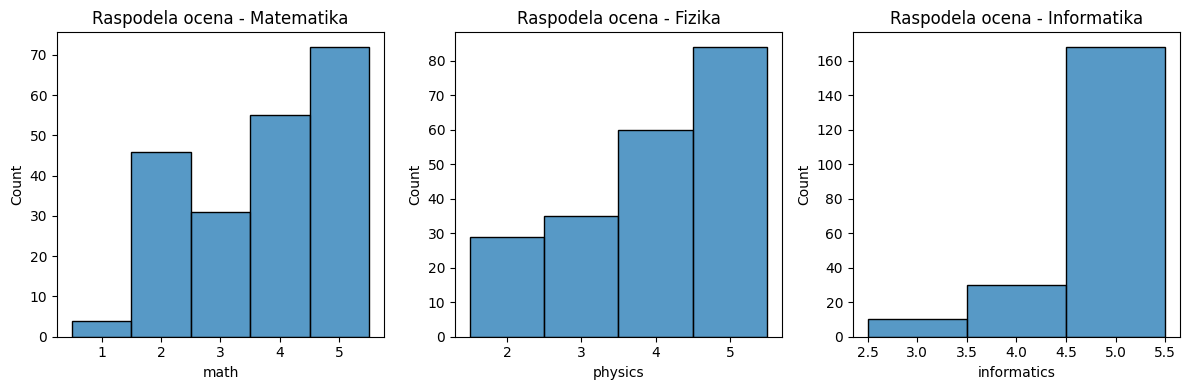

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(df["math"], bins=5, discrete=True)
plt.title("Raspodela ocena - Matematika")

plt.subplot(1,3,2)
sns.histplot(df["physics"], bins=5, discrete=True)
plt.title("Raspodela ocena - Fizika")

plt.subplot(1,3,3)
sns.histplot(df["informatics"], bins=5, discrete=True)
plt.title("Raspodela ocena - Informatika")

plt.tight_layout()
plt.show()

##### Korelacija izmedju varijabli

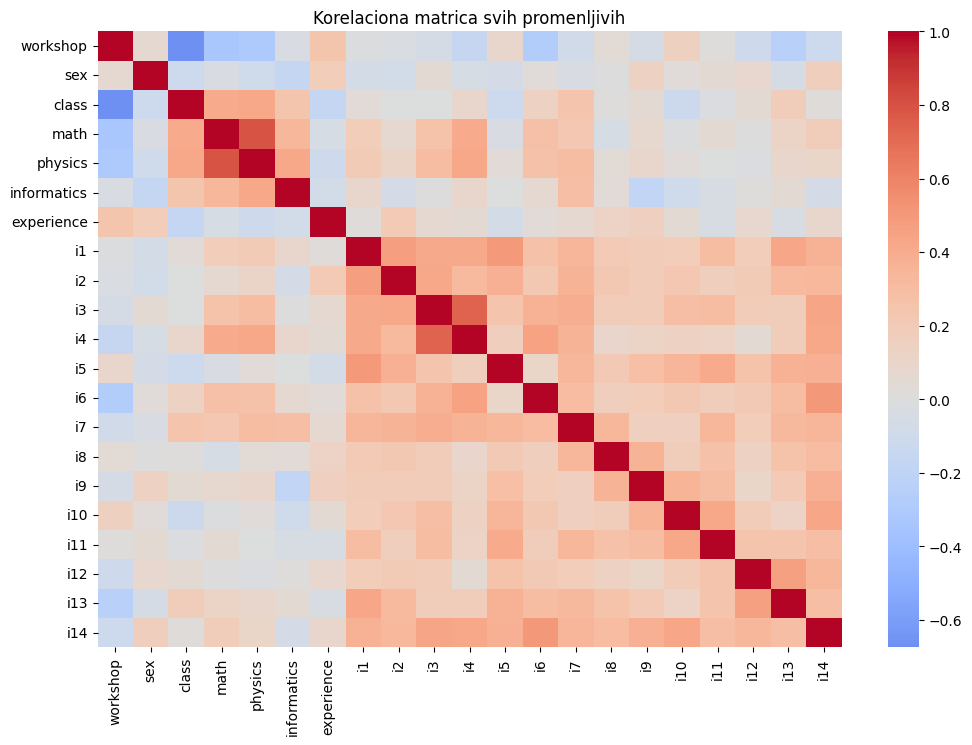

In [43]:
# Korelaciona matrica
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Korelaciona matrica svih promenljivih")
plt.show()

##### Korelacija svake promenljive sa nasom ciljnom promenljivom

In [44]:
# Korelacija sa ciljnom promenljivom i8
corr_with_i8 = df.corr()["i8"].sort_values(ascending=False)
print("Korelacija svake promenljive sa i8:\n")
print(corr_with_i8)

Korelacija svake promenljive sa i8:

i8             1.000000
i9             0.364567
i7             0.339486
i14            0.306492
i11            0.270775
i13            0.262792
i2             0.223009
i5             0.220762
i1             0.203870
i3             0.190751
i10            0.175554
i6             0.167259
i12            0.133818
experience     0.127658
i4             0.097203
workshop       0.041399
physics        0.040976
informatics    0.031913
class          0.010250
sex            0.004300
math          -0.052921
Name: i8, dtype: float64


Najvece korelacije sa i8 su druge izjave ucenika: i9, i7. i14, i11.

To znaci da ucenici koji su osecali povezanost sa grupom i prilagodjenost uzrastu, kao i vaznost saradnje i aktivnosti za obrazovanje, vise veruju da ovakav nacin ucenja daje bolje rezultate.

Takodje, prethodno iskustvo (experience) ima malu, ali pozitivnu korelaciju (0.13) → učenici koji su ranije imali slične radionice malo češće veruju u i8.

### Priprema podataka

In [ ]:
df.drop(columns='Id', inplace=True)

In [33]:
y = list(df['i8'])
features = list(df.columns)
features.remove('i8')

In [35]:
#iz pandas pretvaramo u numpy
X = df.loc[:, features]
X.head()

,workshop,sex,class,math,physics,informatics,experience,i1,i2,i3,i4,i5,i6,i7,i9,i10,i11,i12,i13,i14
0,1,1,9,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5
1,1,1,10,5,5,5,1,5,5,3,4,5,4,5,5,5,5,5,5,5
2,1,1,9,3,5,5,1,5,5,5,5,5,5,5,5,3,3,5,5,5
3,1,1,9,2,4,5,0,5,4,4,4,4,4,5,3,2,3,4,3,5
4,1,1,9,5,4,5,0,3,2,3,4,5,2,2,4,5,3,5,3,5


In [38]:
print(y)

[5, 5, 5, 5, 3, 4, 5, 3, 4, 4, 5, 5, 5, 4, 4, 3, 4, 4, 3, 4, 5, 4, 2, 5, 4, 2, 4, 5, 4, 5, 5, 5, 5, 5, 3, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 5, 3, 5, 4, 5, 3, 4, 3, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 5, 4, 5, 5, 3, 4, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 5, 2, 5, 2, 5, 5, 4, 5, 2, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 3, 4, 5, 5, 5, 4, 5, 3, 4, 5, 5, 5, 4, 3, 4, 3, 4, 5, 2, 4, 2, 4, 5, 5, 5, 5, 3, 4, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 4, 4, 4, 5, 3, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 3, 5, 4, 5, 5, 3, 4, 5, 5, 5, 5, 4, 4, 4, 5, 2, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4]


In [47]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
y_label = label.fit_transform(y)

# Fali nam 1 pa koristimo enkoder
print(y_label)

[3 3 3 3 1 2 3 1 2 2 3 3 3 2 2 1 2 2 1 2 3 2 0 3 2 0 2 3 2 3 3 3 3 3 1 2 2
 2 3 3 2 3 3 2 3 3 2 3 3 3 3 2 3 3 3 3 2 2 2 3 1 3 2 3 1 2 1 2 2 2 2 2 3 2
 3 3 3 3 3 3 3 1 3 3 2 3 3 2 3 3 1 2 3 3 3 3 2 3 2 2 2 2 3 0 3 0 3 3 2 3 0
 3 2 3 3 3 3 3 3 3 2 3 2 2 1 2 3 3 3 2 3 1 2 3 3 3 2 1 2 1 2 3 0 2 0 2 3 3
 3 3 1 2 2 2 3 3 2 3 2 3 3 3 2 2 2 3 1 3 2 3 2 2 2 2 3 3 3 3 1 3 2 3 3 1 2
 3 3 3 3 2 2 2 3 0 3 3 3 2 3 3 3 3 3 2 3 2 2 2]


##### Uklanjanje outlajkera

In [59]:
from sklearn.ensemble import IsolationForest
import numpy as np

out = IsolationForest(contamination = 0.1)
y_pred = out.fit_predict(X)

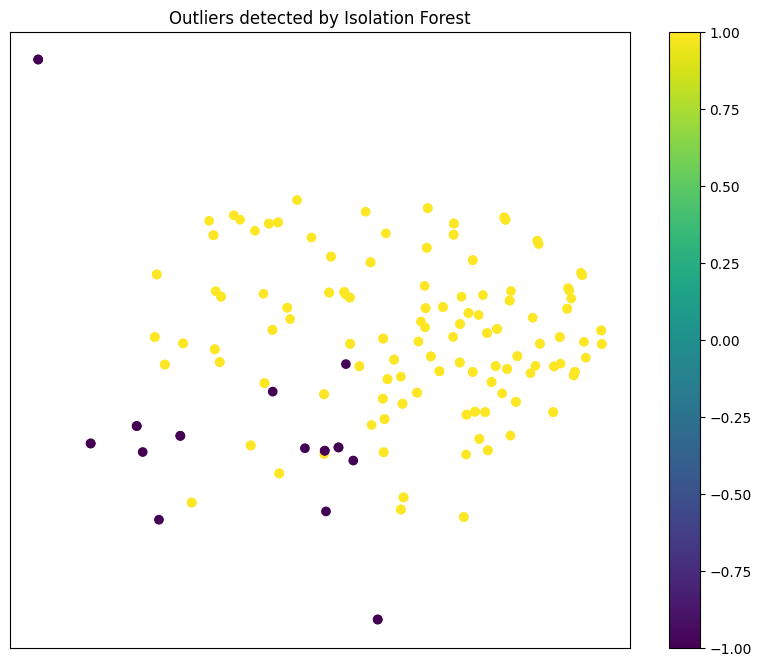

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=y_pred, cmap='viridis')
plt.colorbar()
plt.title('Outliers detected by Isolation Forest')
plt.xticks([])
plt.yticks([])
plt.savefig('outliers_iso_forest.png')
plt.show()

In [60]:
y_pred

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1])

In [62]:
X_clear = X[y_pred == 1]
y_clear = y_label[y_pred == 1]

print(X_clear)
print(y_clear)

     workshop  sex  class  math  physics  informatics  experience  i1  i2  i3  \
0           1    1      9     5        5            5           0   5   5   5   
1           1    1     10     5        5            5           1   5   5   3   
2           1    1      9     3        5            5           1   5   5   5   
3           1    1      9     2        4            5           0   5   4   4   
5           1    1      9     5        5            5           1   4   4   5   
..        ...  ...    ...   ...      ...          ...         ...  ..  ..  ..   
203         2    1      8     4        4            5           1   5   5   5   
204         2    1      8     4        5            5           1   5   4   5   
205         2    1      8     5        4            5           0   5   5   5   
206         2    1      8     5        5            5           0   5   4   5   
207         2    1      8     3        4            5           0   4   4   5   

     i4  i5  i6  i7  i9  i1

In [64]:
print(X.shape)
print(X_clear.shape)

print("------------")
print(y_label.shape)
print(y_clear.shape)

(208, 20)
(187, 20)
------------
(208,)
(187,)


##### Modeli

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [68]:
classifiers = [
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("DecisionTree", DecisionTreeClassifier(random_state=42)),
    ("RandomForest", RandomForestClassifier(random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    ("SVM", SVC()),
    ("MLP", MLPClassifier(max_iter=1000, random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
]

Pravicemo kros validaciju za podatke jer imamo jako mali skup podataka

In [69]:
from sklearn.model_selection import cross_validate

In [70]:
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro'
}

In [81]:
# Funkcija za evaluaciju liste modela
def evaluate_models(models, X, y, cv=10):
    results = {}
    for name, model in models:
        scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
        results[name] = {
            "Accuracy": scores['test_accuracy'].mean(),
            "F1-macro": scores['test_f1_macro'].mean()
        }
    return pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)

In [ ]:
# Rezultati na originalnim podacima
results_original = evaluate_models(classifiers, X, y_label)

# Rezultati na prociscenim podacima
results_cleaned = evaluate_models(classifiers, X_clear, y_clear)

# Spajanje u jednu tabelu
comparison = results_original.add_suffix("_original").join(results_cleaned.add_suffix("_cleaned"))
print(comparison)

c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


                    Accuracy_original  F1-macro_original  Accuracy_cleaned  \
XGBoost                      0.938095           0.921952          0.942105   
GradientBoosting             0.909524           0.867867          0.921053   
RandomForest                 0.909524           0.862718          0.936842   
DecisionTree                 0.900000           0.841277          0.921053   
SVM                          0.639524           0.349085          0.594737   
LogisticRegression           0.635000           0.411782          0.578070   
MLP                          0.437381           0.243788          0.496784   

                    F1-macro_cleaned  
XGBoost                     0.925729  
GradientBoosting            0.912359  
RandomForest                0.923028  
DecisionTree                0.903897  
SVM                         0.317187  
LogisticRegression          0.360510  
MLP                         0.294536  


                    Accuracy  F1-macro
XGBoost             0.938095  0.921952
GradientBoosting    0.909524  0.867867
RandomForest        0.909524  0.862718
DecisionTree        0.900000  0.841277
SVM                 0.639524  0.349085
LogisticRegression  0.635000  0.411782
MLP                 0.437381  0.243788


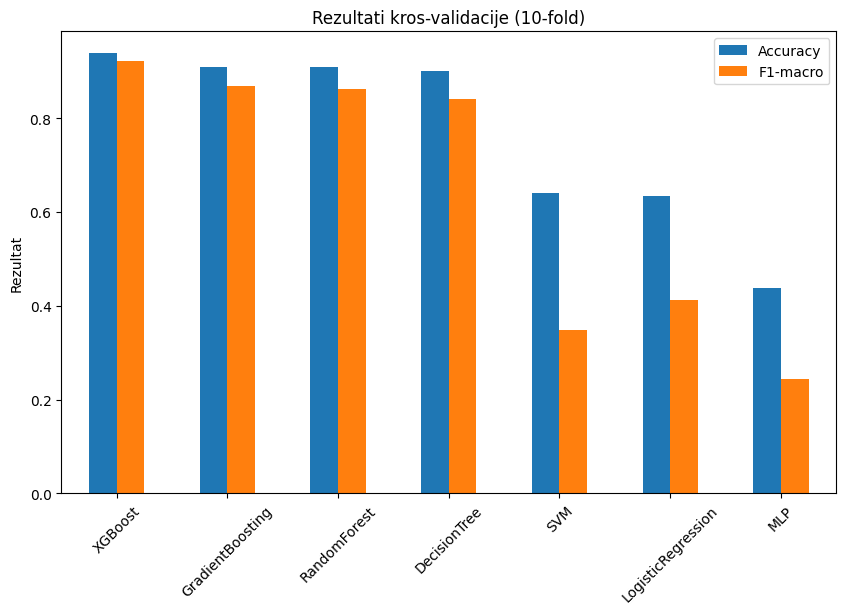

In [83]:
print(results_original)

results_original.plot(kind="bar", figsize=(10,6))
plt.title("Rezultati kros-validacije (10-fold)")
plt.ylabel("Rezultat")
plt.xticks(rotation=45)
plt.show()

                    Accuracy  F1-macro
XGBoost             0.942105  0.925729
RandomForest        0.936842  0.923028
GradientBoosting    0.921053  0.912359
DecisionTree        0.921053  0.903897
SVM                 0.594737  0.317187
LogisticRegression  0.578070  0.360510
MLP                 0.496784  0.294536


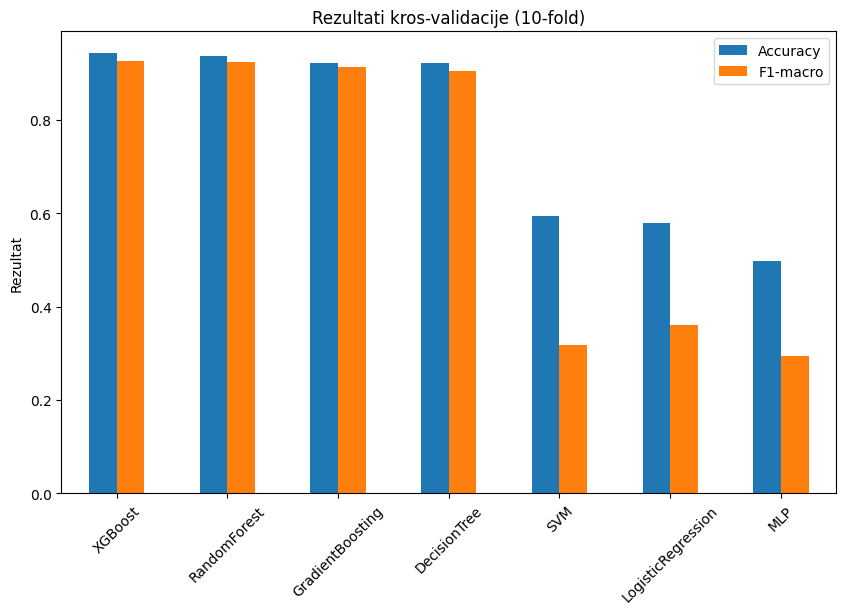

In [84]:
print(results_cleaned)

results_cleaned.plot(kind="bar", figsize=(10,6))
plt.title("Rezultati kros-validacije (10-fold)")
plt.ylabel("Rezultat")
plt.xticks(rotation=45)
plt.show()

##### Hyperparameter tuning

GridSearchCV za RandomForest

In [75]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_rf.fit(X_clear, y_clear)

print("RandomForest - Najbolji parametri (GridSearch):", grid_rf.best_params_)
print("RandomForest - Najbolji rezultat (GridSearch):", grid_rf.best_score_)

c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomForest - Najbolji parametri (GridSearch): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
RandomForest - Najbolji rezultat (GridSearch): 0.9538203969943101


GridSearch za XGBoost

In [76]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_xgb.fit(X_clear, y_clear)

print("XGBoost - Najbolji parametri (GridSearch):", grid_xgb.best_params_)
print("XGBoost - Najbolji rezultat (GridSearch):", grid_xgb.best_score_)

c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:22:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Najbolji parametri (GridSearch): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
XGBoost - Najbolji rezultat (GridSearch): 0.9431452203191334


RandomizedSearchCV za RandomForest

In [77]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    "n_estimators": [50, 100, 200, 300, 400],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6]
}

random_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1
)

random_rf.fit(X_clear, y_clear)

print("RandomForest - Najbolji parametri (RandomizedSearch):", random_rf.best_params_)
print("RandomForest - Najbolji rezultat (RandomizedSearch):", random_rf.best_score_)

c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomForest - Najbolji parametri (RandomizedSearch): {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
RandomForest - Najbolji rezultat (RandomizedSearch): 0.7300408843941426


RandomizedSearchCv za XGBoost

In [78]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

param_dist_xgb = {
    "n_estimators": [50, 100, 200, 300, 400],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=5,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1
)

random_xgb.fit(X_clear, y_clear)

print("XGBoost - Najbolji parametri (RandomizedSearch):", random_xgb.best_params_)
print("XGBoost - Najbolji rezultat (RandomizedSearch):", random_xgb.best_score_)


c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


XGBoost - Najbolji parametri (RandomizedSearch): {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
XGBoost - Najbolji rezultat (RandomizedSearch): 0.947114319736271


c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:22:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


##### Da li izbacivanje nekih featura moze da pomogne?

In [85]:
# Features = samo izjave i1–i14 (bez i8)
features_i = [f"i{i}" for i in range(1,15) if i != 8]
X_i = df[features_i]
y_i = df["i8"]

label = LabelEncoder()
y_i_label = label.fit_transform(y_i)

print("Dimenzije:", X_i.shape, y_i_label.shape)

Dimenzije: (208, 13) (208,)


c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Rezultati modela (samo i1–i14):
                    Accuracy  F1-macro
XGBoost             0.923810  0.886338
RandomForest        0.919048  0.869282
DecisionTree        0.914286  0.855713
GradientBoosting    0.914286  0.877137
MLP                 0.760238  0.606242
SVM                 0.736429  0.497467
LogisticRegression  0.582381  0.386907


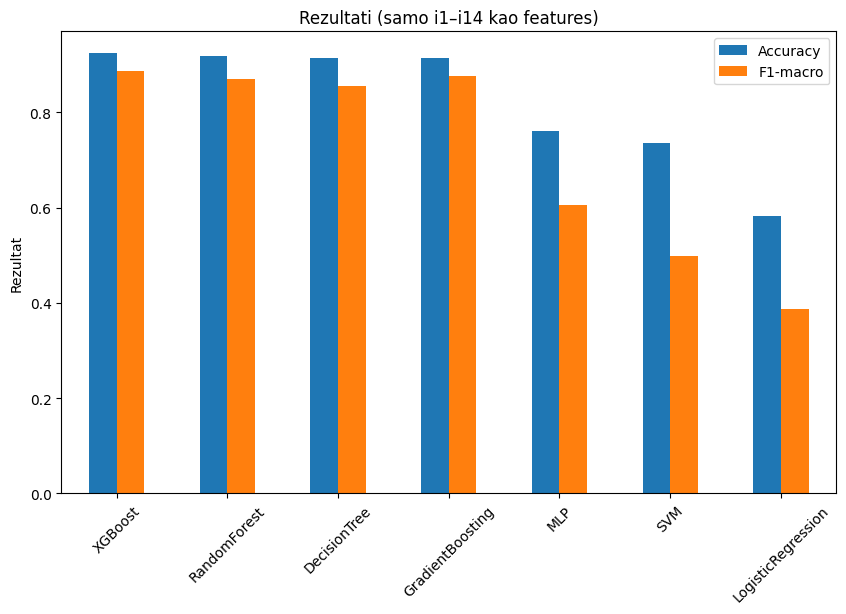

In [86]:
# Evaluacija samo sa i1–i14 features
results_i = evaluate_models(classifiers, X_i, y_i_label)

print("Rezultati modela (samo i1–i14):")
print(results_i.sort_values(by="Accuracy", ascending=False))

# Vizuelizacija
results_i.plot(kind="bar", figsize=(10,6))
plt.title("Rezultati (samo i1–i14 kao features)")
plt.ylabel("Rezultat")
plt.xticks(rotation=45)
plt.show()

In [87]:
# IsolationForest na features i1–i14
out = IsolationForest(contamination=0.1, random_state=42)
y_pred_i = out.fit_predict(X_i)

X_i_clear = X_i[y_pred_i == 1]
y_i_clear = y_i_label[y_pred_i == 1]

In [88]:
print("Original:", X_i.shape, " -> Posle uklanjanja 10% outlier-a:", X_i_clear.shape)

Original: (208, 13)  -> Posle uklanjanja 10% outlier-a: (188, 13)


c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Rezultati (samo i1–i14, cleaned):
                    Accuracy  F1-macro
RandomForest        0.947368  0.928929
DecisionTree        0.942105  0.915549
XGBoost             0.936842  0.909104
GradientBoosting    0.921053  0.900051
MLP                 0.787135  0.670111
SVM                 0.718713  0.483563
LogisticRegression  0.595906  0.364797


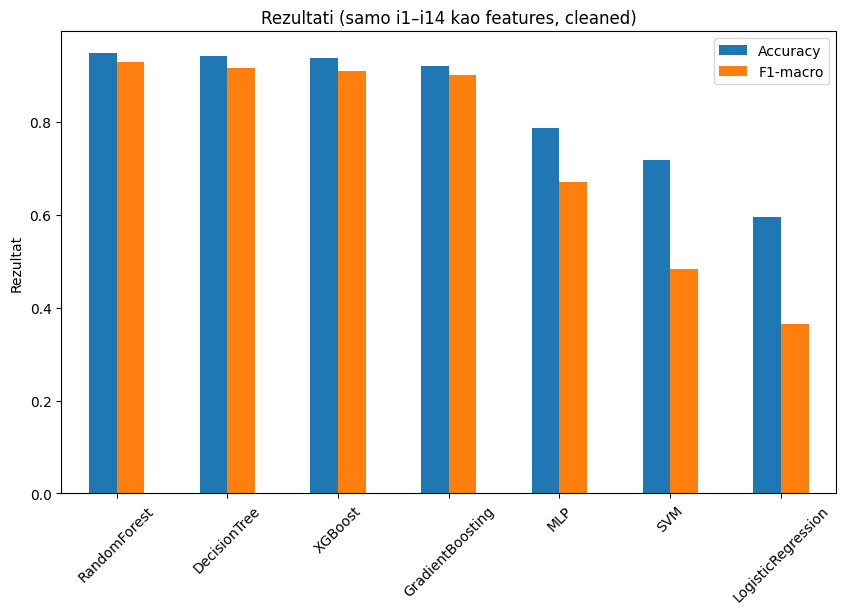

In [89]:
results_i_clear = evaluate_models(classifiers, X_i_clear, y_i_clear)

print("Rezultati (samo i1–i14, cleaned):")
print(results_i_clear.sort_values(by="Accuracy", ascending=False))

# Vizuelizacija
results_i_clear.plot(kind="bar", figsize=(10,6))
plt.title("Rezultati (samo i1–i14 kao features, cleaned)")
plt.ylabel("Rezultat")
plt.xticks(rotation=45)
plt.show()

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_dt.fit(X_i_clear, y_i_clear)

print("DecisionTree - Najbolji parametri (GridSearch):", grid_dt.best_params_)
print("DecisionTree - Najbolji rezultat (GridSearch):", grid_dt.best_score_)


c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


DecisionTree - Najbolji parametri (GridSearch): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTree - Najbolji rezultat (GridSearch): 0.9156861938383678


In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_rf.fit(X_i_clear, y_i_clear)

print("RandomForest - Najbolji parametri (GridSearch):", grid_rf.best_params_)
print("RandomForest - Najbolji rezultat (GridSearch):", grid_rf.best_score_)


c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomForest - Najbolji parametri (GridSearch): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest - Najbolji rezultat (GridSearch): 0.9486479541130703


In [92]:
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_dist_dt = {
    "max_depth": [None] + list(range(3, 21, 2)),
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6, 8]
}

random_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=20,
    cv=5,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1
)

random_dt.fit(X_i_clear, y_i_clear)

print("DecisionTree - Najbolji parametri (RandomizedSearch):", random_dt.best_params_)
print("DecisionTree - Najbolji rezultat (RandomizedSearch):", random_dt.best_score_)


DecisionTree - Najbolji parametri (RandomizedSearch): {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 19}
DecisionTree - Najbolji rezultat (RandomizedSearch): 0.5724284501028687


c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [93]:
rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    "n_estimators": [50, 100, 200, 300, 400],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6]
}

random_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1
)

random_rf.fit(X_i_clear, y_i_clear)

print("RandomForest - Najbolji parametri (RandomizedSearch):", random_rf.best_params_)
print("RandomForest - Najbolji rezultat (RandomizedSearch):", random_rf.best_score_)


c:\Users\marij\Desktop\Faks\2024-25\Letnji\Inteligentni Sistemi\Seminarski\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomForest - Najbolji parametri (RandomizedSearch): {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
RandomForest - Najbolji rezultat (RandomizedSearch): 0.7217970912359183


#### Zakljucak i RF drvo




Istrazivnje јe pokazalo da se stav uchenika o efikasnosti STEM radionica (i8) moze veoma tacno predvideti. Ansambl modeli, posebno Random Forest, postigli su naјbolje rezultate, sa F1-makro vrednoscu oko 0.95 nakon fino podesenih parametara. 

In [100]:
import graphviz
from sklearn.tree import export_graphviz

best_rf = grid_rf.best_estimator_
estimator = best_rf.estimators_[0]

export_graphviz(
    estimator,
    out_file="tree.dot",
    feature_names=[f"i{i}" for i in range(1, 15) if i != 8],
    class_names=[str(c) for c in best_rf.classes_],
    rounded=True,
    filled=True
)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)
graphviz.Source(dot_graph).render("tree_visual", format="png", cleanup=True)

'tree_visual.png'